# Problem Set 7
### Question 0
We download the data, and using ```train.csv``` as required.
And We random divide data into 80 percent of train data,
10 percent of validation data and 10 percent of test data.

In [1]:
from sklearn.linear_model import ElasticNetCV,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
from time import time

In [2]:
data= pd.read_csv("train.csv")
train_data = data.sample(frac=0.8,random_state=2021)
remain_data = data.drop(train_data.index)
val_data = remain_data.sample(frac=0.5,random_state=2021)
test_data = remain_data.drop(val_data.index)

In [3]:
train_data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
2811,6,67.464907,50.311442,55.529535,34.363354,1.627538,1.433495,121.32760,20.538402,38.356475,...,2.133792,2.401874,2.102954,1.748971,1.377422,2,1.059633,0.763763,0.429766,30.00
7135,5,74.231650,51.941084,60.515221,35.476710,1.453747,1.305329,121.32760,21.387655,39.445875,...,2.078431,2.168944,2.064624,1.594167,1.224621,1,1.054118,0.400000,0.268849,58.00
15454,3,79.791500,56.861550,74.985686,55.837452,1.036386,0.776563,67.76850,35.238375,28.567737,...,4.525000,3.914868,4.432322,1.077556,0.523756,2,3.650000,0.816497,0.836286,10.70
13393,3,131.354737,125.121052,128.748661,122.761689,1.078089,1.071503,62.51421,23.532500,27.042234,...,3.750000,3.634241,3.722419,1.090060,1.009614,1,1.250000,0.471405,0.433013,1.92
11332,3,163.700667,163.700667,148.036037,148.036037,1.014515,1.014515,134.05880,44.686267,62.780488,...,4.666667,4.641589,4.641589,1.093375,1.093375,1,0.333333,0.471405,0.471405,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15371,2,148.077000,106.710840,140.417733,105.137641,0.641878,0.345865,94.01400,83.300760,47.007000,...,6.000000,6.000000,6.000000,0.693147,0.226968,0,5.280000,0.000000,0.000000,0.29
19572,4,110.056303,105.661123,80.724266,71.326087,1.137115,0.982386,164.13150,57.305453,74.028755,...,4.400000,3.833659,4.264809,1.342126,1.018639,3,1.976000,1.224745,1.113553,3.10
7966,4,105.313925,76.633000,73.088376,42.605417,1.125848,1.158646,188.38390,31.383691,71.695924,...,2.181818,2.213364,2.153013,1.368922,1.198849,1,0.909091,0.433013,0.385695,90.00
17289,3,102.302133,91.399950,90.058852,80.917438,0.968260,1.030824,119.79660,27.191750,54.060807,...,2.750000,2.884499,2.632148,1.060857,1.090060,2,0.250000,0.816497,0.829156,1.12


In [4]:
val_data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
12186,2,53.456540,92.669681,36.073699,92.380521,0.388302,0.003944,78.899680,92.585641,39.449840,...,4.994000,3.872983,4.992343,0.661563,0.013188,2,4.976000,1.000000,0.109380,9.12
2065,5,97.923650,98.641607,74.415540,79.410940,1.410948,1.381716,167.840600,36.950657,58.153193,...,2.714286,2.701920,2.479397,1.494365,1.548489,4,0.571429,1.549193,1.385051,78.50
20657,4,47.464942,55.132576,42.460912,50.897402,1.280830,1.088478,55.970231,20.873504,21.785066,...,4.026201,3.223710,3.474255,1.222779,1.158746,5,1.692140,2.121320,1.855998,25.10
9080,5,72.894330,51.212070,59.223421,34.916059,1.447756,1.328172,121.327600,20.720892,39.834730,...,2.076923,2.168944,2.063362,1.594167,1.231766,1,1.063077,0.400000,0.266469,76.00
10814,7,94.072540,50.896894,78.537548,33.324056,1.819553,1.798014,141.250600,11.142459,43.475175,...,2.352941,3.120319,2.244700,1.853152,1.570224,4,1.058824,1.498298,0.903664,25.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,5,89.337180,52.045693,70.560647,35.183662,1.444537,1.389791,124.908250,18.959421,46.917667,...,2.092308,2.491462,2.072515,1.564957,1.275087,2,1.015385,0.800000,0.338462,71.70
916,5,69.171250,50.927480,54.872765,34.940157,1.419173,1.327633,121.327600,20.008840,41.809011,...,2.077882,2.168944,2.064164,1.594167,1.238056,1,1.049844,0.400000,0.267985,85.00
18655,5,73.225019,78.948417,66.737975,74.451377,1.512174,1.216821,98.228700,29.613193,34.008518,...,3.633160,2.605171,3.411903,1.489750,1.084102,4,1.992391,1.414214,1.213984,16.00
18465,4,111.476455,68.985279,74.430102,39.864932,1.164253,0.995368,156.448000,40.930889,63.592458,...,4.333333,3.567621,4.082370,1.332179,0.911814,3,2.513333,1.299038,1.490712,7.32


In [5]:
test_data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.000
31,6,102.741978,102.841781,81.547130,72.543073,1.633227,1.038561,157.05460,69.648770,52.815680,...,2.450000,2.289428,2.400331,1.772139,1.300021,1,1.205000,0.471405,0.497494,79.300
41,4,76.444563,48.380362,59.356672,32.487621,1.199541,1.327279,121.32760,11.019732,43.823354,...,2.094118,2.213364,2.077798,1.368922,1.164370,1,0.894118,0.433013,0.291992,90.000
52,4,90.278600,94.017673,66.989987,80.285295,1.178060,1.149863,128.24260,35.998327,53.286096,...,2.181818,2.213364,2.153013,1.368922,1.265001,1,0.727273,0.433013,0.385695,18.000
105,4,91.808100,50.556220,67.689303,32.583192,1.173514,1.337785,134.36060,10.204180,54.877137,...,2.060000,2.213364,2.049252,1.368922,1.117281,1,1.020000,0.433013,0.237487,88.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21219,3,129.169293,117.819960,122.162273,109.219524,1.045523,0.951196,101.98788,47.555960,41.651162,...,5.666667,5.646216,5.646216,1.095078,0.904180,1,2.800000,0.471405,0.471405,0.785
21233,7,64.073395,68.994691,50.714667,54.252727,1.752162,1.433471,122.90607,27.437731,39.330466,...,3.228750,2.712353,3.027354,1.860419,1.510421,4,1.225000,1.195229,1.134206,10.100
21238,7,64.073395,68.999225,50.714667,54.257168,1.752162,1.416413,122.90607,27.712421,39.330466,...,3.223750,2.712353,3.023002,1.860419,1.485762,4,1.245000,1.195229,1.132999,26.600
21249,3,135.777533,135.467640,126.142532,124.017412,1.030578,0.975011,120.16240,50.568200,49.068328,...,4.800000,3.914868,4.477695,1.012331,0.918428,4,2.000000,1.699673,1.469694,3.800


In [6]:
train_data_x = train_data.values[:, :-1]
train_data_y = train_data.values[:, -1]
val_data_x = val_data.values[:, :-1]
val_data_y = val_data.values[:, -1]
test_data_x = test_data.values[:, :-1]
test_data_y = test_data.values[:, -1]

### Question1
In this question, to reduce the influence of random,
for all the model, we will set ```random_state``` to 2021.
#### Part a
We use ```ElasticNetCV``` to choose the best parameters and gets all the result.
To choose the best model, For ```l1_ratio```, we choose from \[0,0.05,0.1,...,1 \].
E.g we choose it from 0 to 1 with step 0.05.
For ```C```, we choose from \[0,0.25,0.5,...,10\].
E.g we choose it from 0 to 10 with step 0.25.

In [7]:
l1_ratio_list = list(np.arange(0,1.05,0.05))
c_list = list(np.arange(0,10.1,0.25))
model_a = ElasticNetCV(l1_ratio=l1_ratio_list,n_jobs=8,
                      alphas=c_list,cv=10,random_state=2021)
model_a.fit(train_data_x,train_data_y)

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, ran

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2651761.8742161808, tolerance: 1802.296401563256
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2530990.6536309877, tolerance: 1788.684846257552
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2595043.8077436583, tolerance: 1803.857943487242
  tol, rng, rando

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42067.77649160195, tolerance: 1795.637270013505
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2664121.7077970924, tolerance: 1802.611871487742
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1009557.3507869306, tolerance: 1804.810528139255
  tol, rng, random

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13229.566441644914, tolerance: 1795.637270013505
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5948.806225594133, tolerance: 1801.7100962465515
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64916.62085301615, tolerance: 1790.1954761156812
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14243.565099251457, tolerance: 1804.810528139255
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8938.414815905504, tolerance: 1802.296401563256
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25531.99888655916, tolerance: 1802.611871487742
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18751.229978148825, tolerance: 1801.7100962465515
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12995.289929455146, tolerance: 1795.637270013505
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13062.935290042311, tolerance: 1788.684846257552
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13527.36146037653, tolerance: 1804.764684214788
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13947.000345919281, tolerance: 1801.7100962465515
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13949.87023241166, tolerance: 1798.2112497789842
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18148.488164120354, tolerance: 1803.857943487242
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152803.16140372911, tolerance: 1802.296401563256
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15343.26554323174, tolerance: 1804.764684214788
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12329.458089224994, tolerance: 1795.637270013505
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5958.442561159842, tolerance: 1803.857943487242
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 722644.2463174649, tolerance: 1802.611871487742
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15532.247688012198, tolerance: 1802.296401563256
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12679.593178057112, tolerance: 1802.611871487742
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71948.66686277092, tolerance: 1790.1954761156812
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17352.7333012335, tolerance: 1804.810528139255
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 327564.17410461884, tolerance: 1802.611871487742
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8981.1211663438, tolerance: 1795.637270013505
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1226

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14124.553389047273, tolerance: 1804.810528139255
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3309.0942092491314, tolerance: 1802.611871487742
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2066022.837074637, tolerance: 1801.7100962465515
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17909.636418932118, tolerance: 1790.1954761156812
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11451.863163133152, tolerance: 1788.684846257552
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17038.66004558187, tolerance: 1802.611871487742
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13124.577665452845, tolerance: 1788.684846257552
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12033.867450415157, tolerance: 1790.1954761156812
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18555.284491229802, tolerance: 1804.810528139255
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15841.011223247275, tolerance: 1802.611871487742
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2366440.356919272, tolerance: 1803.857943487242
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14579.622541423887, tolerance: 1788.684846257552
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265630.7277895729, tolerance: 1803.857943487242
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13839.310613896698, tolerance: 1801.7100962465515
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 513014.9559618151, tolerance: 1798.2112497789842
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17360.477289894596, tolerance: 1790.1954761156812
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17235.945582954213, tolerance: 1802.611871487742
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309089.0314424541, tolerance: 1801.7100962465515
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1818.0219124630094, tolerance: 1804.810528139255
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2132.8942272625864, tolerance: 1790.1954761156812
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65480.16466989275, tolerance: 1788.684846257552
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2256.1038178298622, tolerance: 1804.810528139255
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19966.481741119176, tolerance: 1802.611871487742
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 160673.79980118107, tolerance: 1804.764684214788
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37917.779858944006, tolerance: 1802.611871487742
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18021.83138755802, tolerance: 1788.684846257552
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166398.64313612133, tolerance: 1790.1954761156812
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 276440.38803397864, tolerance: 1790.1954761156812
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100199.31381629314, tolerance: 1802.611871487742
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 440278.9679646557, tolerance: 1790.1954761156812
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46186.6780590117, tolerance: 1804.810528139255
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46853.862353306264, tolerance: 1802.296401563256
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98253.29051771387, tolerance: 1790.1954761156812
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1875.162515311502, tolerance: 1804.764684214788
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2364473.869983144, tolerance: 1802.611871487742
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46558.600777194835, tolerance: 1795.637270013505
  tol, rng, random, positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1

e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1336: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X, y)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2645879.1521846177, tolerance: 1999.2129645980672
  positive)


ElasticNetCV(alphas=[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5,
                     2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0,
                     5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, ...],
             cv=10,
             l1_ratio=[0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25,
                       0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5,
                       0.55, 0.6000000000000001, 0.65, 0.7000000000000001, 0.75,
                       0.8, 0.8500000000000001, 0.9, 0.9500000000000001, 1.0],
             n_jobs=8, random_state=2021)

In [8]:
a_res = model_a.mse_path_
a_res = a_res.sum(axis=2)
a_res = a_res/10
a_res = np.flip(a_res,axis=1)

Now we make the result a dataframe,

In [9]:
df_a = pd.DataFrame(a_res,index=l1_ratio_list,columns=c_list)
df_a.index.name = 'l1_ratio'
df_a.columns.name = 'C'

In [10]:
df_a

C,0.00,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,...,7.75,8.00,8.25,8.50,8.75,9.00,9.25,9.50,9.75,10.00
l1_ratio,,,,,,,,,,,,,,,,,,,,,
0.00,313.064448,328.448112,330.041043,331.180070,332.182153,333.115682,334.001675,334.848292,335.659586,336.438168,...,348.205841,348.584295,348.953986,349.315296,349.668601,350.014331,350.353286,350.688277,351.033231,351.469391
0.05,313.059898,328.517680,330.222833,331.440301,332.503298,333.501614,334.454003,335.367397,336.237028,337.065816,...,349.897895,350.326709,350.744997,351.151755,351.549273,351.935665,352.313039,352.686685,353.072155,353.542679
0.10,313.056993,328.595236,330.417724,331.679743,332.807707,333.885638,334.903983,335.861332,336.781803,337.671202,...,351.597311,352.072132,352.535261,352.989417,353.436942,353.878277,354.314177,354.748180,355.198107,355.764569
0.15,313.054421,328.681957,330.591873,331.917279,333.139514,334.261689,335.314029,336.319369,337.308694,338.291821,...,353.450463,353.978429,354.496348,355.007983,355.514271,356.015259,356.511471,357.006529,357.518628,358.146532
0.20,313.051792,328.774392,330.755981,332.188603,333.445988,334.602766,335.681226,336.766502,337.841213,338.877413,...,355.364829,355.969076,356.560193,357.137848,357.696239,358.237724,358.771366,359.303096,359.854004,360.510991
0.25,313.049385,328.858817,330.933145,332.437808,333.735494,334.888024,336.059150,337.231794,338.367960,339.492003,...,357.392467,358.018951,358.643047,359.268252,359.886507,360.494709,361.099483,361.693446,362.284425,362.952172
0.30,313.048081,328.939719,331.136837,332.672121,333.960146,335.192132,336.464251,337.697652,338.904100,340.081803,...,359.411021,360.115133,360.807612,361.480797,362.123625,362.748146,363.352496,363.937610,364.506088,365.103553
0.35,313.047038,329.018140,331.342380,332.893411,334.186754,335.533743,336.863024,338.133332,339.407606,340.687266,...,361.406217,362.120030,362.818302,363.480987,364.110018,364.734505,365.351991,365.965636,366.559897,367.125390
0.40,313.043358,329.085065,331.507565,333.075505,334.440953,335.871101,337.209900,338.560495,339.936834,341.297877,...,363.234788,363.953263,364.658490,365.350729,366.007121,366.617335,367.201383,367.774033,368.343656,368.912597


And the best parameter for ```C``` is 0 and for ```l1_ratio``` is 0.95.

In [11]:
print(model_a.alpha_,model_a.l1_ratio_)

0.0 0.9500000000000001


#### Part b
For this part, we will use ```GridSearchCV``` function in sklearn
to choose the best model. Due to the time limit
(running more than 30 mins for the following code),
for ```max_depth```(max depth for one tree in the Randomforest),
we will choose from 10 to 24 with step 2.
For ```n_estimators```(the number of trees in randomforest),
we will choose from the 80 to 135 with step 5.

And since we will use 10-fold cross-validation(which means ```cv=10```),
we will use 10 threads to run the code.(which mean ```n_jobs=10```)

In [12]:
tree_depth = list(range(10,26,2))
numtree = list(range(80,140,5))
para_b = {"n_estimators" :numtree,
             "max_depth" : tree_depth}
RF_model = RandomForestRegressor(random_state=2021)
model_b = GridSearchCV(RF_model,
                      param_grid=para_b,
                      n_jobs=10,cv=10,scoring='neg_mean_squared_error')
model_b.fit(train_data_x,train_data_y)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=2021),
             n_jobs=10,
             param_grid={'max_depth': [10, 12, 14, 16, 18, 20, 22, 24],
                         'n_estimators': [80, 85, 90, 95, 100, 105, 110, 115,
                                          120, 125, 130, 135]},
             scoring='neg_mean_squared_error')

In [13]:
df_b = model_b.cv_results_['mean_test_score'].reshape(len(numtree),len(tree_depth))
df_b = np.abs(df_b)
df_b = pd.DataFrame(df_b,index=numtree,columns=tree_depth)
df_b.index.name = "tree_number"
df_b.columns.name = "tree_depth"

In [14]:
df_b

tree_depth,10,12,14,16,18,20,22,24
tree_number,,,,,,,,
80,115.705096,115.711455,115.691280,115.767221,115.811065,115.632840,115.694545,115.686643
85,115.735316,115.625368,115.656932,115.665566,101.208922,101.106913,101.169567,101.210741
90,101.259044,101.108377,101.175365,101.189016,101.172675,101.060445,101.019311,101.009536
95,94.595293,94.588440,94.621756,94.619639,94.646043,94.443657,94.511183,94.503878
100,94.512838,94.390543,94.319531,94.301010,92.248429,92.190633,92.235741,92.259700
105,92.253597,92.103324,92.207132,92.162177,92.128324,91.996633,91.919629,91.919050
110,91.540084,91.504302,91.529352,91.533186,91.559497,91.433751,91.515832,91.525559
115,91.547841,91.431259,91.365097,91.382654,91.625871,91.577545,91.539003,91.553887
120,91.543353,91.383847,91.468352,91.476969,91.448947,91.335519,91.268037,91.249061


And we can get the best parameter is ```num_tree=135```
and ```tree_depth=20``` , the best mse is 91.249.

In [15]:
print(model_b.best_params_,model_b.best_score_)

{'max_depth': 20, 'n_estimators': 135} -91.24906144065477


#### Part c
For this part, we also use ```GridSearchCV``` function.
And with the same reason. we will choose ```n_estimators```(boosting number)
from 90 to 390 with step 10. And we set  ```learning rate```  to  0.25
which is greater than the default value that is 0.1,
because we want learn the model more quickly than default
due to the time limit. And we do not want the learning rate is too large
since it will affect the performance of model.

In [36]:
lr = 0.25
boosting_list = list(range(90,400,10))
para_b = {"n_estimators" :boosting_list}
GBDT_model = GradientBoostingRegressor(learning_rate=lr,random_state=2021)
model_c = GridSearchCV(GBDT_model,
                      param_grid=para_b,
                      n_jobs=10,cv=10,scoring='neg_mean_squared_error')
model_c.fit(train_data_x,train_data_y)

GridSearchCV(cv=10,
             estimator=GradientBoostingRegressor(learning_rate=0.25,
                                                 random_state=2021),
             n_jobs=10,
             param_grid={'n_estimators': [90, 100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200, 210, 220, 230,
                                          240, 250, 260, 270, 280, 290, 300,
                                          310, 320, 330, 340, 350, 360, 370,
                                          380, ...]},
             scoring='neg_mean_squared_error')

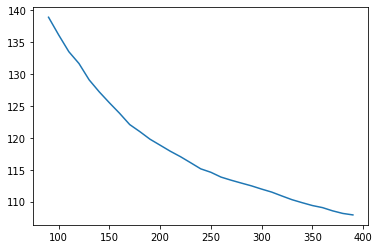

In [37]:
plt.plot(boosting_list,np.abs(model_c.cv_results_['mean_test_score']))
plt.show()

And the best result here is ```boosting round``` is 290 , the best mse is 107.896.

In [41]:
print(model_c.best_params_,model_c.best_score_)

{'n_estimators': 390} -107.89593604969079


### Question 2
First, we use 3 best model in **Question 1** to get the MSE from validation set.
for **part b** and ** part c**, we use the function ```GridSearchCV```.
And in this function, it will refit the best model with the whole dataset.
Hence, we only need to use attribute ```best_estimator_``` to
get the model trained on the whole train set with best parameter in 10-fold CV.

In [39]:
model1 = ElasticNet(alpha=0,l1_ratio=0.95,random_state=2021)
model1.fit(train_data_x,train_data_y)
model2 = model_b.best_estimator_
model3 = model_c.best_estimator_
model_list = [model1,model2,model3]
y_list = [model.predict(val_data_x) for model in model_list]
res_dict = {}
model_name = ["ElasticNet","Random Forest", "GBDT"]
mse_list = [mean_squared_error(y,val_data_y) for y in y_list]
for i in range(3):
    res_dict[model_name[i]] = mse_list[i]

e:\python\lib\site-packages\ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
e:\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2645879.1521846177, tolerance: 1999.2129645980672
  positive)


In [40]:
res_val_df = pd.DataFrame(res_dict,index=["validation mse result"])
res_val_df

,ElasticNet,Random Forest,GBDT
validation mse result,308.330431,89.59117,101.921097


The best model according to the result is random forest, And we use it to predict the test set.

In [42]:
best_model = model2
y_pre = best_model.predict(test_data_x)
test_mse = mean_squared_error(y_pre,test_data_y)
print(test_mse)

83.82043662056232


Get the test mse is 83.820.